## Influence of Temperature on the output of a NN trained on MNIST

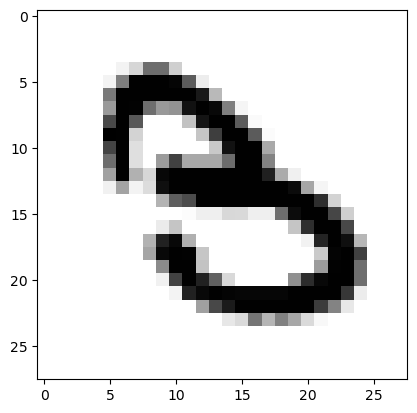

3


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train),(x_test, y_test) = mnist.load_data()

#example input which later be used to determine the influence 
plt.imshow(x_test[18], cmap="gray_r")
plt.show()
print(y_test[18])


#preparation of the training and test data 
x_train = x_train.astype("float32")/255.
x_train = x_train.reshape(-1, 784)
x_test = x_test.astype("float32")/255.
x_test = x_test.reshape(-1, 784)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras import layers
from tensorflow.keras import activations

In [14]:
#definition and training of the used model 
model = Sequential()

model.add(Dense(200, activation="relu", input_shape=(784,)))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10))
model.add(layers.Activation('softmax'))
#model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

model.fit(
    x_train,
    y_train,
    epochs=15,
    batch_size=1000
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               157000    
                                                                 
 dense_5 (Dense)             (None, 300)               60300     
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 248,410
Trainable params: 248,410
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
60/60 [==============================

In [15]:
#evaluation of the accuracy of the model 
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0663 - accuracy: 0.9803


[0.06632150709629059, 0.9803000092506409]

In [16]:
#storing the ouput of every layer of the model when inputting handwritten 3 
from tensorflow.keras import Model
import numpy as np

layer_outputs = []
for i in range(1, len(model.layers)):
    tmp_model = Model(model.layers[0].input, model.layers[i].output)
    tmp_output = tmp_model.predict(np.reshape(x_test[18], (1,784)))[0]
    layer_outputs.append(tmp_output)

#values of last Dense layer (without applying the softmax activation)    
print(len(layer_outputs[2]))    
print(layer_outputs[2])

1/1 [==============================] - 0s 37ms/step
10
[-6.3046465 -3.8205454 -3.065783   7.162049  -4.396761  -1.8403825
 -5.9172797 -5.557784   2.576307  -3.1321795]


In [17]:
#manually calculating the result of the trained network using different temperature values 
import math


def softmax(input_vec, temperature):
    sum_exp = sum(math.exp(x/temperature) for x in input_vec)
    return [math.exp(x/temperature)/sum_exp for x in input_vec]

temperature = 5
output = softmax(layer_outputs[2], temperature) 
for num in output:
    print(np.format_float_scientific(num, precision = 2))

3.01e-02
4.94e-02
5.74e-02
4.44e-01
4.40e-02
7.34e-02
3.25e-02
3.49e-02
1.78e-01
5.67e-02
